
#user_id - PII(personal information identifier)
#id - unique values
#model_id-dropped because 73% are 12(same values) number, so this can create bias
#ids are categorical variable.


There will be 3 final models.


**Data preprocessing**

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
data = pd.read_csv("YourCabs.csv")
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [ ]:
data['from_date'] = pd.to_datetime(data['from_date'])


In [ ]:
data['booking_created'] = pd.to_datetime(data['booking_created'])


In [ ]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0


In [ ]:
data.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


##Data observation


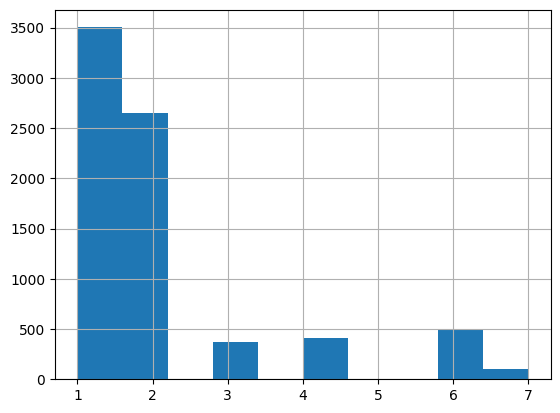

In [ ]:
data.package_id.hist();
#1 and 2 pacakge is more common

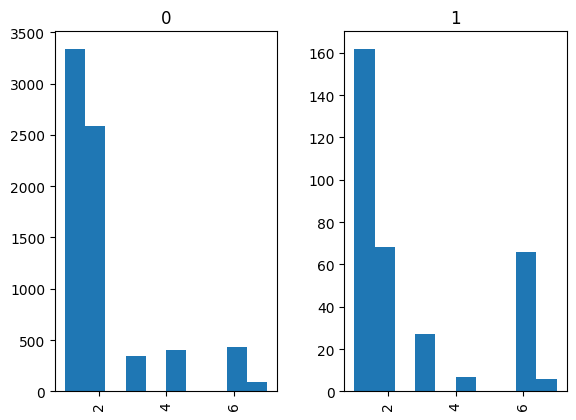

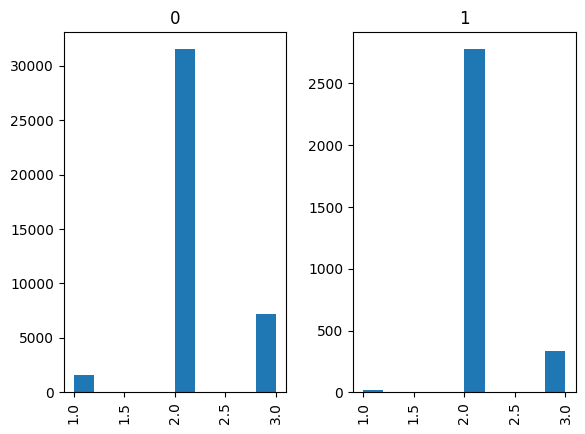

In [ ]:
data.hist(column='package_id', by='Car_Cancellation');
data.hist(column='travel_type_id', by='Car_Cancellation');
#1 and 2 package gets cancelled the most.

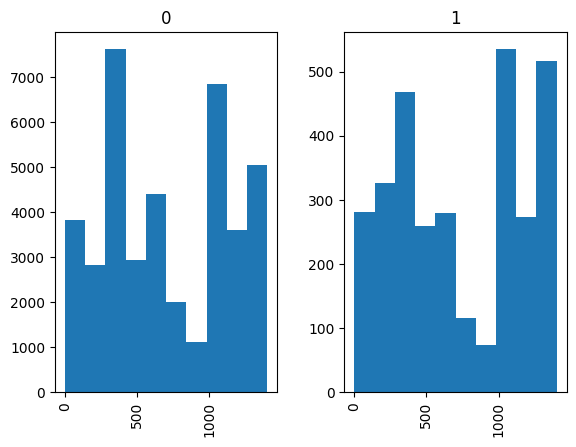

In [ ]:
data.hist(column='from_area_id', by='Car_Cancellation');


In [ ]:
#dropping unnecessary data
data = data.drop(columns=['id', 'user_id', 'package_id',	'to_area_id',	'from_city_id',	'to_city_id',
'from_lat','from_long','to_lat',	'to_long'])

data.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,28,2,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0
1,12,2,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0
2,12,2,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0
3,12,2,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0
4,12,2,1365.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0


In [ ]:
data.shape

(43431, 8)

In [ ]:
data.loc[:, 'from_month'] = data.from_date.dt.month
data.loc[:, 'from_weekday'] = data.from_date.dt.weekday

data.loc[:, 'booking_month'] = data.booking_created.dt.month
data.loc[:, 'booking_weekday'] = data.booking_created.dt.weekday

In [ ]:
data.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_month,from_weekday,booking_month,booking_weekday
0,28,2,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,1,1,1,1
1,12,2,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,1,1,1,1
2,12,2,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,1,1,1,1
3,12,2,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,1,1,1,1
4,12,2,1365.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,1,1,1,1


In [ ]:
features_cols = ['vehicle_model_id', 'travel_type_id', 'from_area_id',
                 'online_booking', 'mobile_site_booking',
                 'from_month', 'booking_month' , 'from_weekday', 'booking_weekday'
                 ]

In [ ]:
X = data[features_cols]
X.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
0,28,2,83.0,0,0,1,1,1,1
1,12,2,1010.0,0,0,1,1,1,1
2,12,2,1301.0,0,0,1,1,1,1
3,12,2,768.0,0,0,1,1,1,1
4,12,2,1365.0,0,0,1,1,1,1


In [ ]:
Y=data["Car_Cancellation"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.85,random_state=42)

In [ ]:
print(xtrain.shape)
xtrain.head()

(36916, 9)


,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
19499,85,2,1068.0,0,0,6,6,0,6
18555,12,2,1234.0,0,0,6,6,6,6
5225,85,2,393.0,0,0,2,2,4,4
11762,12,2,625.0,1,0,5,4,2,1
27159,12,2,1288.0,1,0,8,8,5,5


In [ ]:
print(ytrain.shape)
ytrain.head()

(36916,)


19499    0
18555    0
5225     0
11762    0
27159    0
Name: Car_Cancellation, dtype: int64

In [ ]:
print(xtest.shape)
xtest.head()

(6515, 9)


,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
8161,12,2,1084.0,1,0,3,3,3,3
22177,12,2,1017.0,0,0,7,7,3,3
1829,12,2,585.0,0,0,1,1,2,0
2464,85,2,1365.0,0,0,1,1,6,6
42829,24,2,689.0,0,0,11,11,1,1


In [ ]:
print(ytest.shape)
ytest.head()

(6515,)


8161     0
22177    0
1829     0
2464     0
42829    0
Name: Car_Cancellation, dtype: int64

##Missing value treatment


In [ ]:
xtrain.isnull()  # checks for every value if null or not

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
19499,False,False,False,False,False,False,False,False,False
18555,False,False,False,False,False,False,False,False,False
5225,False,False,False,False,False,False,False,False,False
11762,False,False,False,False,False,False,False,False,False
27159,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6265,False,False,False,False,False,False,False,False,False
11284,False,False,False,False,False,False,False,False,False
38158,False,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False,False


In [ ]:
xtrain.isnull().sum()  # aggregate the null count

vehicle_model_id        0
travel_type_id          0
from_area_id           71
online_booking          0
mobile_site_booking     0
from_month              0
booking_month           0
from_weekday            0
booking_weekday         0
dtype: int64

In [ ]:
xtest.isnull().sum()

vehicle_model_id        0
travel_type_id          0
from_area_id           17
online_booking          0
mobile_site_booking     0
from_month              0
booking_month           0
from_weekday            0
booking_weekday         0
dtype: int64

In [ ]:
xtrain.isnull().sum() * 100 / xtrain.shape[0]
#after checking null value, deleted many columns starting from begining and proceeded again

vehicle_model_id       0.000000
travel_type_id         0.000000
from_area_id           0.192329
online_booking         0.000000
mobile_site_booking    0.000000
from_month             0.000000
booking_month          0.000000
from_weekday           0.000000
booking_weekday        0.000000
dtype: float64

In [ ]:
xtrain['from_area_id'] = xtrain['from_area_id'].fillna(xtrain['from_area_id'].mean())
xtest['from_area_id'] = xtest['from_area_id'].fillna(xtrain['from_area_id'].mean())

In [ ]:
xtrain.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
online_booking         0
mobile_site_booking    0
from_month             0
booking_month          0
from_weekday           0
booking_weekday        0
dtype: int64

In [ ]:
xtest.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
online_booking         0
mobile_site_booking    0
from_month             0
booking_month          0
from_weekday           0
booking_weekday        0
dtype: int64

<Axes: >

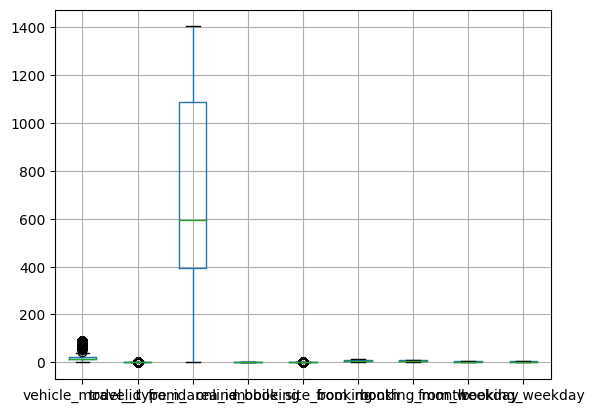

In [ ]:
xtrain.boxplot()

no outliers

In [ ]:
xtrain.describe()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
count,36916.000000,36916.000000,36916.000000,36916.000000,36916.000000,36916.000000,36916.000000,36916.000000,36916.000000
mean,25.691408,2.138260,714.492007,0.352991,0.042800,6.479738,6.427349,3.109275,3.131542
std,26.775657,0.437765,419.977276,0.477906,0.202408,2.940522,2.916101,1.990110,1.956089
min,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,2.000000,393.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000
50%,12.000000,2.000000,595.000000,0.000000,0.000000,7.000000,7.000000,3.000000,3.000000
75%,24.000000,2.000000,1089.000000,1.000000,0.000000,9.000000,9.000000,5.000000,5.000000
max,91.000000,3.000000,1403.000000,1.000000,1.000000,12.000000,11.000000,6.000000,6.000000


In [ ]:
xtest.describe()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_month,booking_month,from_weekday,booking_weekday
count,6515.000000,6515.000000,6515.000000,6515.000000,6515.000000,6515.000000,6515.000000,6515.000000,6515.000000
mean,25.863546,2.131543,714.841192,0.343668,0.045741,6.429163,6.375748,3.116347,3.098695
std,26.927511,0.437403,416.534936,0.474968,0.208938,2.953640,2.927120,1.970453,1.942272
min,10.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,2.000000,393.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000
50%,12.000000,2.000000,601.000000,0.000000,0.000000,7.000000,7.000000,3.000000,3.000000
75%,24.000000,2.000000,1087.000000,1.000000,0.000000,9.000000,9.000000,5.000000,5.000000
max,91.000000,3.000000,1401.000000,1.000000,1.000000,12.000000,11.000000,6.000000,6.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.08518454 -0.31357081 -1.50411174 ... -1.85746283 -1.06200225
  -1.08833206]
 [-0.51187624 -0.31357081  0.7036687  ... -1.85746283 -1.06200225
  -1.08833206]
 [-0.51187624 -0.31357081  1.39672599 ... -1.85746283 -1.06200225
  -1.08833206]
 ...
 [-0.51187624  1.97106162  0.61792966 ...  1.56983817  1.45419015
   1.47050499]
 [ 2.28684616 -0.31357081  1.30622366 ...  1.56983817  1.45419015
   1.47050499]
 [-0.51187624 -0.31357081 -0.06083779 ...  1.56983817 -1.56524073
   1.47050499]]


##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
print('Accuracy Score:')
print(metrics.accuracy_score(ytest,y_pred))

Accuracy Score:
0.9286262471220261


In [ ]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
print('Accuracy Score:')
print(metrics.accuracy_score(ytest,y_pred))

Accuracy Score:
0.9286262471220261


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_curve,precision_score,roc_auc_score
cnf_matrix = confusion_matrix(ytest,y_pred)
cnf_matrix

array([[6050,    0],
       [ 465,    0]])

Text(0.5, 427.9555555555555, 'Predicted label')

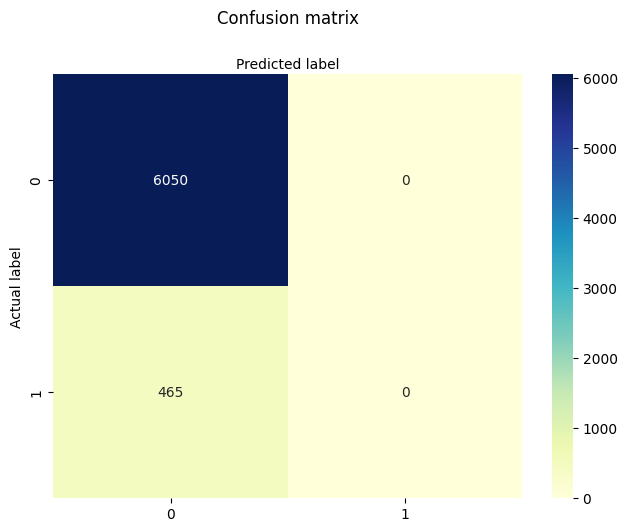

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
precision = precision_score(ytest,y_pred)
precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

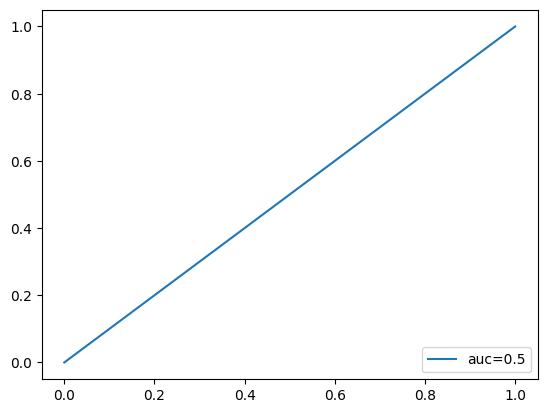

In [ ]:
fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Naive Bayes

In [ ]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(xtrain, ytrain)

In [ ]:
# Predict Output
pred = model.predict(xtest)
print(pred[:150])

In [ ]:
# Plot Confusion Matrix
#plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [ ]:
# Importing the dependancies
from sklearn import metrics
# Predicted values
y_pred = pred
# Actual values
y_act = ytest
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(pred, ytest, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(pred, ytest, labels=[0, 1]))

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  #  DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

In [ ]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(xtrain,ytrain)

model_dt_2_score_train = model_dt_2.score(xtrain,ytrain)

model_dt_2_score_test = model_dt_2.score(xtrain,ytrain)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

In [ ]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(xtrain,ytrain)

model_dt_8_score_tarin = model_dt_8.score(xtrain,ytrain)

model_dt_8_score_test = model_dt_8.score(xtrain,ytrain)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

In [ ]:
from io import StringIO
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt_8,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
predictions = model_dt_2.predict(xtest)
print(model_dt_2.score(xtest,ytest))

In [ ]:
predictions = model_dt_8.predict(xtest)
print(model_dt_8.score(xtest,ytest))

In [ ]:
print(predictions)

In [ ]:
accuracy_score(ytest,predictions)

In [ ]:
def create_conf_mat(ytest, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(ytest.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (ytest.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = ytest,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [ ]:
plt.figure(figsize=(10,8))
conf_mat = create_conf_mat(ytest, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()